In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

import seaborn as sns

In [4]:
%matplotlib inline


# Get Started W/ Startracker Data

In this notebook I take a look on the data from the night 8th March 2023. 

Happy Women’s International Day !

## Acquire the data

1) I go to RubinTV using the devlopment page link:
https://roundtable.lsst.codes/rubintv-dev/summit/startracker

2) Click on ```Download Metadata```

3) Copy the .json file to this folder

In [5]:
from datetime import date

# today = date.today()
today = '2023-03-09'
print("Today's date:", today)

Today's date: 2023-03-09


## Load The Data
The json file can be read with pandasdropna

In [6]:
import pandas as pd
def read_rubintv(fname):
    df = pd.read_json(fname).T
    df = df.dropna()
    times = df[['UTC','UTC wide']]
    
    df = df.drop(columns=['UTC','UTC wide'])
    df = df.astype(float)
    
    # set time vectors
    timenew = (today+'T'+ times['UTC'].to_numpy()).astype(np.datetime64)
    timenew2= (today+'T'+ times['UTC wide'].to_numpy()).astype(np.datetime64)
    df['UTC'] = pd.Series(timenew, index=df.index)
    df['UTC wide'] = pd.Series(timenew2, index=df.index)
    df['seq'] = df.index
    
    # transform alt to -180, 180
    df['Az'] = np.where(df['Az']>180, df['Az']-360, df['Az'])
    #df['Az'] = np.where(df['Az']>180, df['Az']-360, df['Az'])
    
    return df.set_index('UTC')

# fname = 'startracker-wide_2023-03-08.json'
fname = 'startracker_2023-03-08.json'
_df = read_rubintv(fname)

In [7]:
df = _df[np.abs(_df['Delta Az Arcsec wide']) < 1e6] #remove_outlier(_df,'Delta Az Arcsec')

In [8]:
def plot_delta_AzAlt(df, xcol, ax=None):
    df = df.set_index(xcol)
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].scatter(df.index, df['Delta Alt Arcsec'], color='tab:blue', label='narrow')
    ax[0].scatter(df.index, df['Delta Alt Arcsec wide'], color='tab:orange', label='wide')
    ax[0].set_xlabel(xcol, fontsize=16)
    ax[0].set_ylabel('Delta Alt Arcsec',fontsize=16)
    ax[0].legend(fontsize=14)

    ax[1].scatter(df.index, df['Delta Az Arcsec'])
    ax[1].scatter(df.index, df['Delta Az Arcsec wide'])
    ax[1].set_ylabel('Delta Az Arcsec',fontsize=16)
    ax[1].set_xlabel(xcol, fontsize=16)

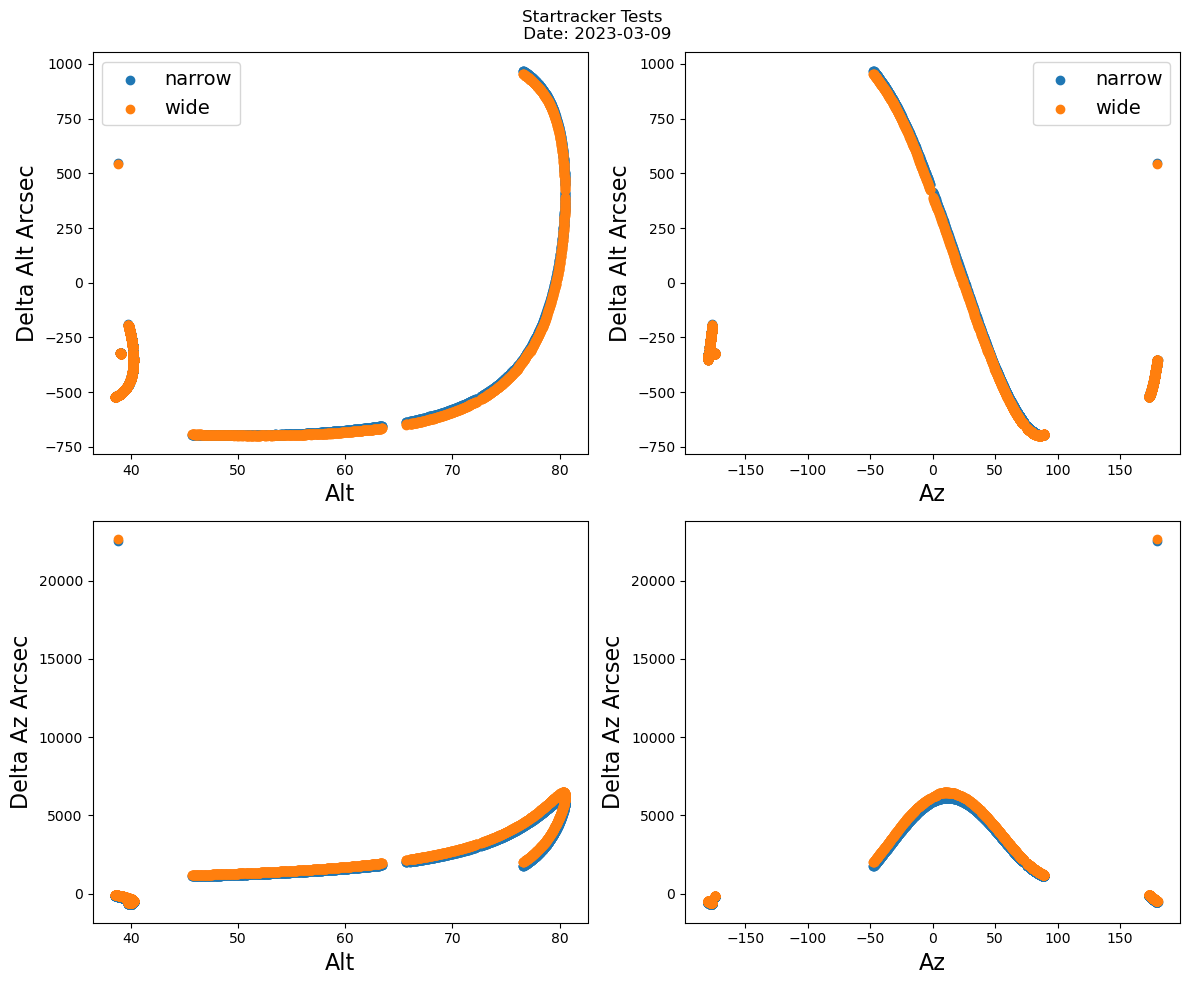

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))
plot_delta_AzAlt(df, 'Alt', [axs[0,0], axs[1,0]] )
plot_delta_AzAlt(df, 'Az', [axs[0,1], axs[1,1]] )
fig.suptitle('Startracker Tests \n Date: %s'%today)
fig.tight_layout()
fig.savefig('deltaAzAlt_grid.png', dpi=100)

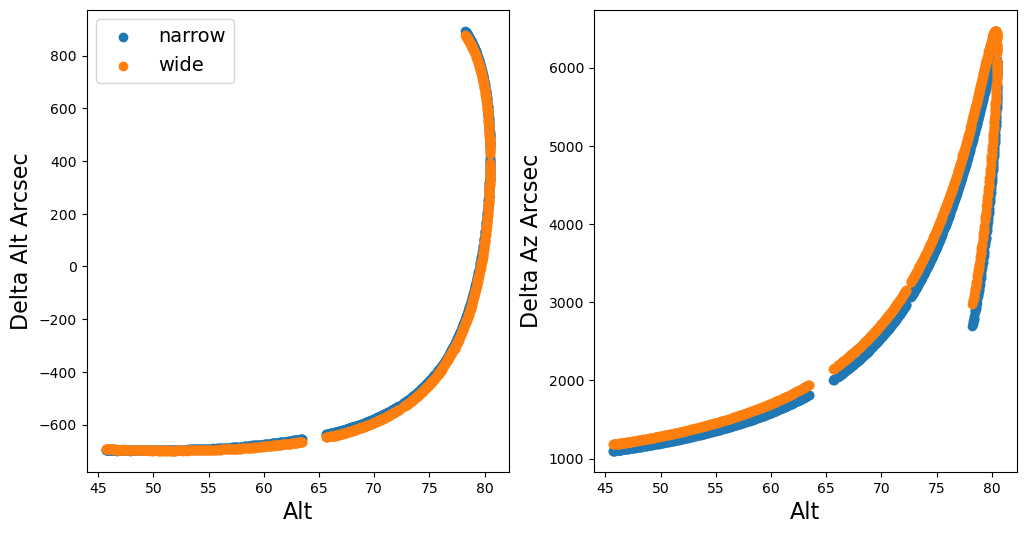

In [10]:
plot_delta_AzAlt(df, 'Alt')

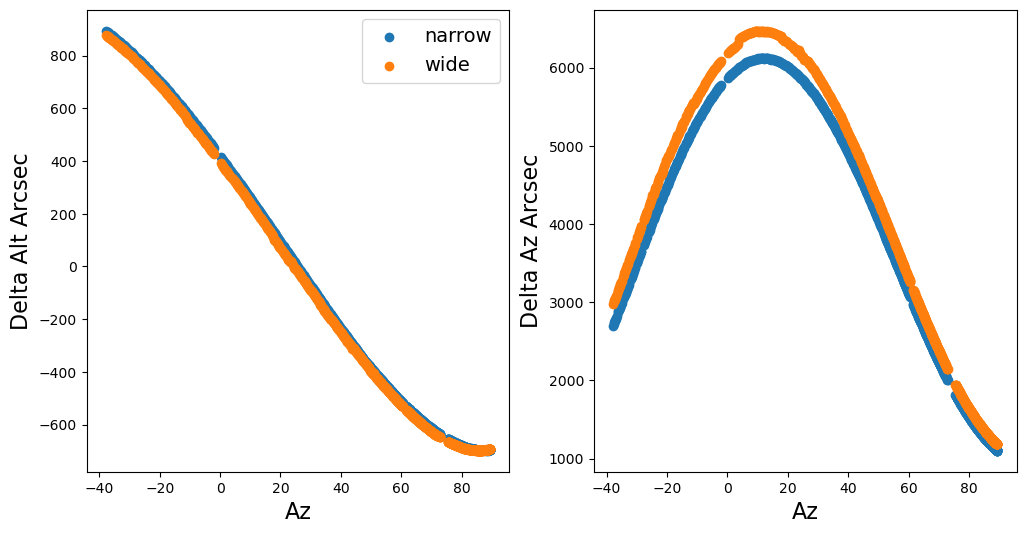

In [11]:
plot_delta_AzAlt(df, 'Az')

/tmp/ipykernel_19803/306022210.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0, 0.5, 'Az')

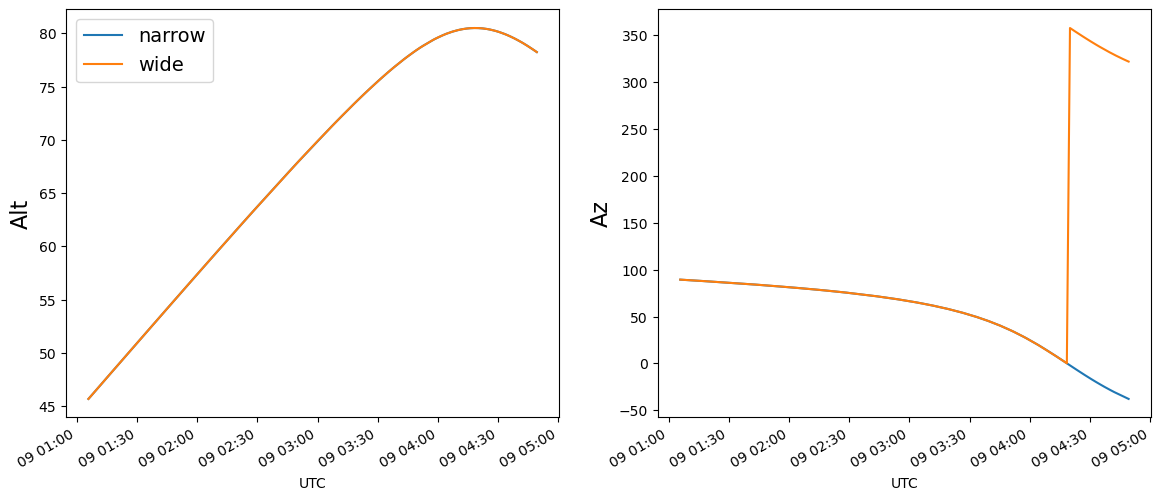

In [12]:
plt.subplots(figsize=(14,6))

plt.subplot(1,2,1)
df['Alt'].plot(label='narrow')
df['Alt wide'].plot(label='wide')
plt.ylabel('Alt',fontsize=16)
plt.legend(fontsize=14)

plt.subplot(1,2,2)
df['Az'].plot()
df['Az wide'].plot()
plt.ylabel('Az',fontsize=16)

/tmp/ipykernel_16693/3552642708.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0, 0.5, 'Delta Dec Arcsec')

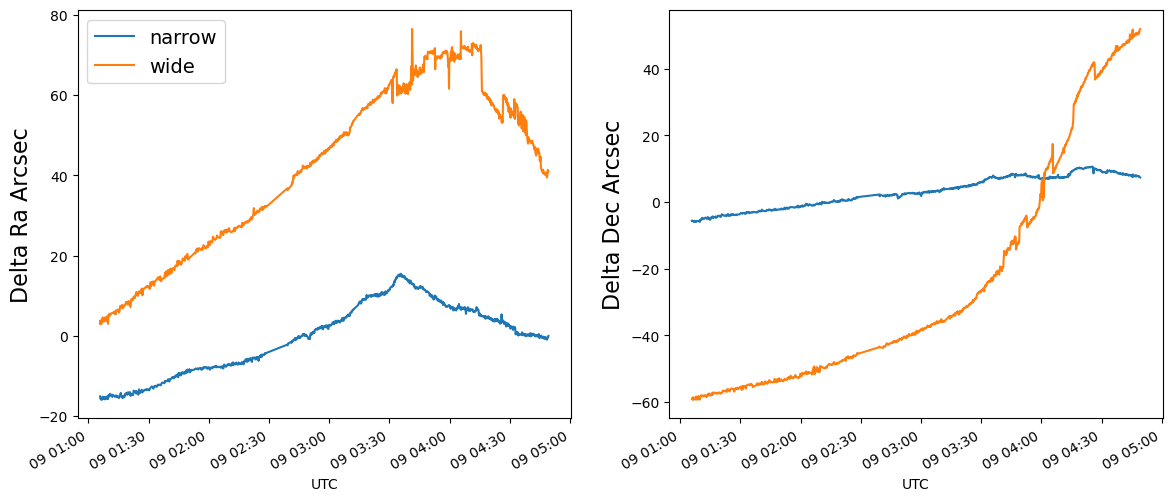

In [142]:
plt.subplots(figsize=(14,6))

plt.subplot(1,2,1)
df['Delta Ra Arcsec'].plot(label='narrow')
df['Delta Ra Arcsec wide'].plot(label='wide')
plt.ylabel('Delta Ra Arcsec',fontsize=16)
plt.legend(fontsize=14)

plt.subplot(1,2,2)
df['Delta Dec Arcsec'].plot()
df['Delta Dec Arcsec wide'].plot()
plt.ylabel('Delta Dec Arcsec',fontsize=16)

# All-Night Data

In [14]:
fname = 'startracker_2023-03-08_all_night.json'
_df = read_rubintv(fname)

# remove outliers
df = _df[np.abs(_df['Delta Az Arcsec wide']) < 1e6] 

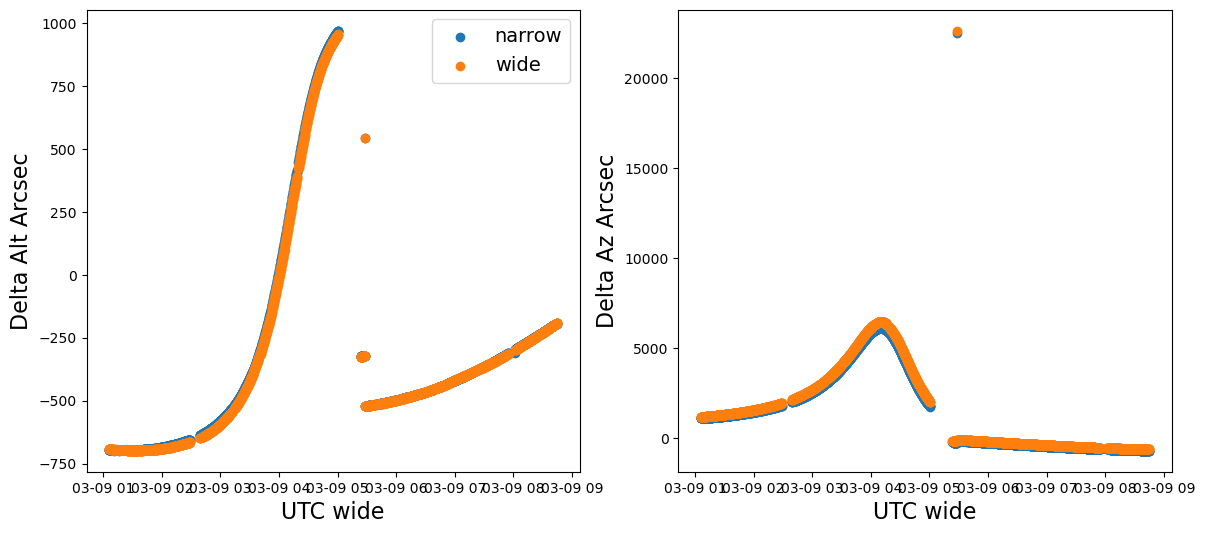

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

plot_delta_AzAlt(df, 'UTC wide', ax=axs)

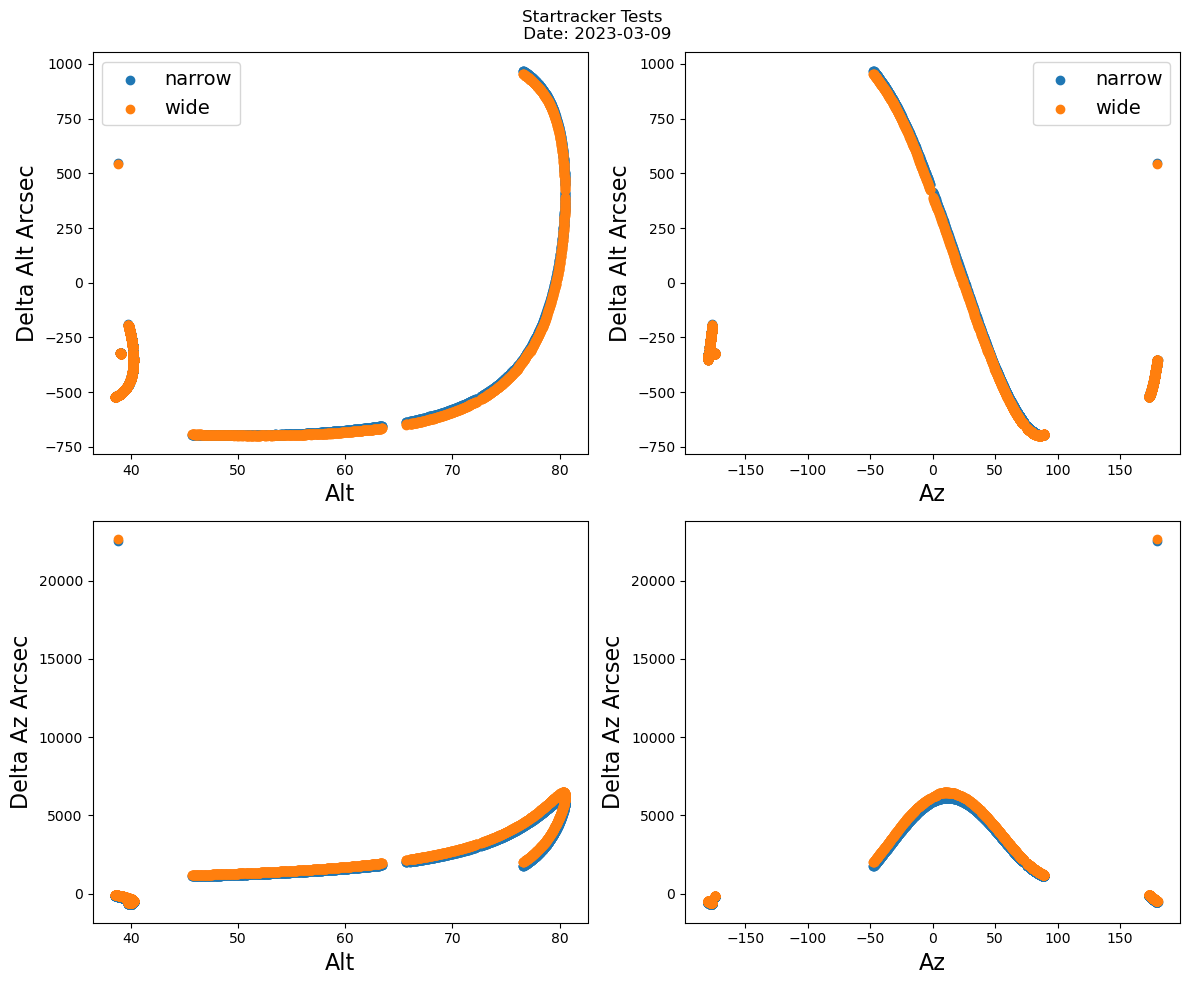

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))
plot_delta_AzAlt(df, 'Alt', [axs[0,0], axs[1,0]] )
plot_delta_AzAlt(df, 'Az', [axs[0,1], axs[1,1]] )
fig.suptitle('Startracker Tests \n Date: %s'%today)
fig.tight_layout()
fig.savefig('deltaAzAlt_grid_all_night.png', dpi=100)

# Exploration

<b> Here I was familirizing myself with the data-structure </b>

I'll look into some data-series and correlations. 

In [77]:
df.columns

Index(['Exposure Time', 'MJD', 'Ra', 'Dec', 'Alt', 'Az', 'Exposure Time wide',
       'MJD wide', 'Ra wide', 'Dec wide', 'Alt wide', 'Az wide', 'nSources',
       'nSources filtered', 'nSources wide', 'nSources filtered wide',
       'Calculated Ra', 'Calculated Dec', 'Calculated Alt', 'Calculated Az',
       'Delta Ra Arcsec', 'Delta Dec Arcsec', 'Delta Alt Arcsec',
       'Delta Az Arcsec', 'Delta Rot Arcsec', 'RMS scatter arcsec',
       'RMS scatter pixels', 'Calculated Ra wide', 'Calculated Dec wide',
       'Calculated Alt wide', 'Calculated Az wide', 'Delta Ra Arcsec wide',
       'Delta Dec Arcsec wide', 'Delta Alt Arcsec wide',
       'Delta Az Arcsec wide', 'Delta Rot Arcsec wide',
       'RMS scatter arcsec wide', 'RMS scatter pixels wide'],
      dtype='object')

In [78]:
df

,Exposure Time,MJD,Ra,Dec,Alt,Az,Exposure Time wide,MJD wide,Ra wide,Dec wide,...,Calculated Dec wide,Calculated Alt wide,Calculated Az wide,Delta Ra Arcsec wide,Delta Dec Arcsec wide,Delta Alt Arcsec wide,Delta Az Arcsec wide,Delta Rot Arcsec wide,RMS scatter arcsec wide,RMS scatter pixels wide
2,4.0,60012.045717,160.349024,-20.742774,45.691228,89.405366,5.0,60012.045723,160.349083,-20.742739,...,-20.759162,45.500345,89.732430,3.735810,-59.124122,-693.350613,1181.288497,1.050478e+06,4.524791,0.522306
3,4.0,60012.045827,160.349076,-20.742740,45.725338,89.385057,5.0,60012.045832,160.349150,-20.742739,...,-20.759124,45.534632,89.712210,2.863801,-58.985575,-692.715575,1181.416475,1.050477e+06,4.532521,0.523193
4,4.0,60012.045935,160.349050,-20.742740,45.759173,89.364949,5.0,60012.045941,160.349061,-20.742740,...,-20.759194,45.568403,89.692448,3.487366,-59.234435,-693.277213,1182.870167,1.050477e+06,4.551560,0.525383
5,4.0,60012.046044,160.349142,-20.742739,45.793008,89.344827,5.0,60012.046050,160.349042,-20.742774,...,-20.759064,45.602366,89.672253,3.788901,-58.645525,-693.468919,1182.792339,1.050475e+06,4.595462,0.530451
6,4.0,60012.046154,160.349161,-20.742739,45.827113,89.324538,5.0,60012.046159,160.349082,-20.742774,...,-20.759284,45.636713,89.652360,3.012964,-59.438767,-692.257636,1184.032706,1.050463e+06,4.321739,0.498859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,4.0,60012.058968,160.349101,-20.742738,49.820810,86.846149,5.0,60012.058974,160.349090,-20.742738,...,-20.758376,49.628905,87.200990,10.583955,-56.297204,-697.680867,1281.855291,1.049890e+06,4.645061,0.536192
126,4.0,60012.059185,160.348984,-20.742775,49.888747,86.802074,5.0,60012.059191,160.349015,-20.742776,...,-20.758363,49.696506,87.157584,11.053667,-56.115432,-698.239536,1283.846157,1.049872e+06,4.621261,0.533446
128,4.0,60012.059402,160.349148,-20.742742,49.955864,86.758337,5.0,60012.059407,160.349095,-20.742742,...,-20.758298,49.763805,87.114212,11.074239,-55.999156,-698.222055,1285.589885,1.049852e+06,4.681456,0.540391
130,4.0,60012.059619,160.349116,-20.742742,50.023517,86.714227,5.0,60012.059625,160.349083,-20.742743,...,-20.758314,49.831638,87.070561,10.613001,-56.055566,-697.261974,1287.031770,1.049832e+06,4.658716,0.537763


In [16]:
df.dtypes

Exposure Time              object
MJD                        object
Ra                         object
Dec                        object
Alt                        object
Az                         object
UTC                        object
Exposure Time wide         object
MJD wide                   object
Ra wide                    object
Dec wide                   object
Alt wide                   object
Az wide                    object
UTC wide                   object
nSources                   object
nSources filtered          object
nSources wide              object
nSources filtered wide     object
Calculated Ra              object
Calculated Dec             object
Calculated Alt             object
Calculated Az              object
Delta Ra Arcsec            object
Delta Dec Arcsec           object
Delta Alt Arcsec           object
Delta Az Arcsec            object
Delta Rot Arcsec           object
RMS scatter arcsec         object
RMS scatter pixels         object
Calculated Ra 

In [123]:
# _ = df.hist(figsize=(12,16))

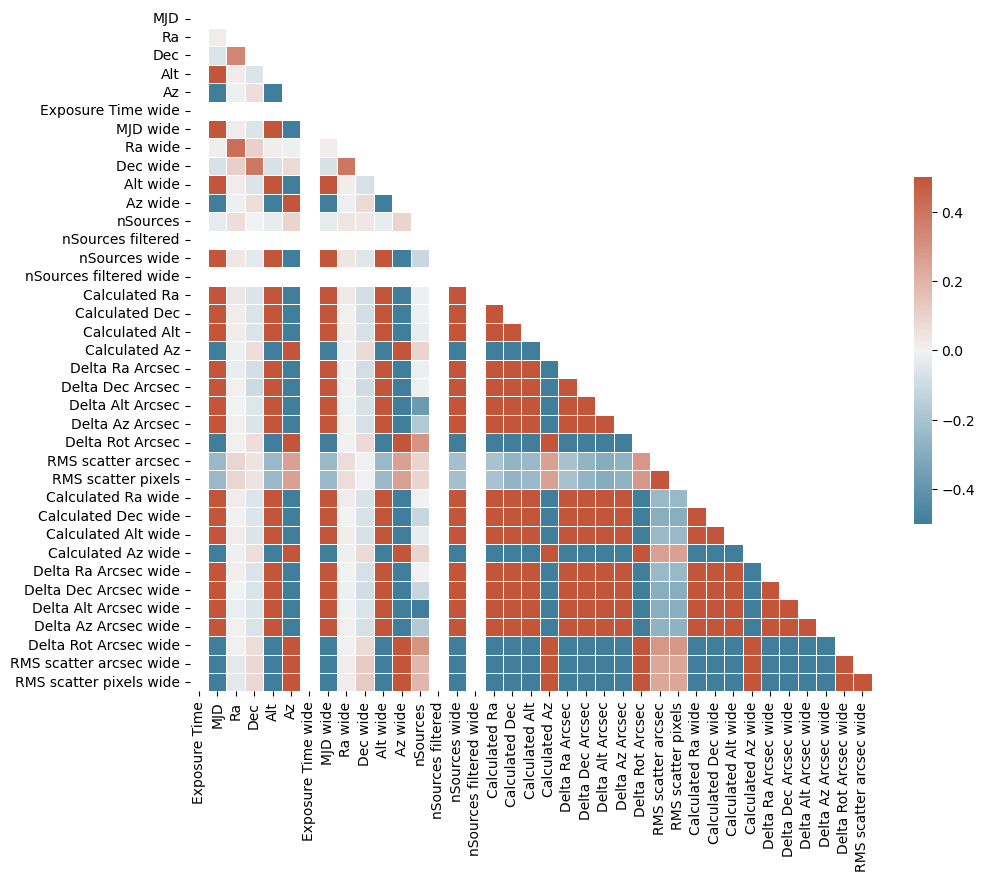

In [ ]:
df_corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
# plt.title(f'AuxTel Pointing Investigation - {len(df1)} Fields \n Observation Runs From Feb 2020 up to Nov 2021',fontsize=16)
# plt.savefig(f'figures/rev_correlation_matrix_{date}.png',facecolor='w',transparent=False,dpi=100)

In [ ]:
colx = 'nSources'
coly = 'Delta Az Arcsec wide'
colz = 'Az wide'

In [ ]:
x = df[colx].to_numpy().astype(int)
y = df[coly].to_numpy()
z = df[colz].to_numpy()

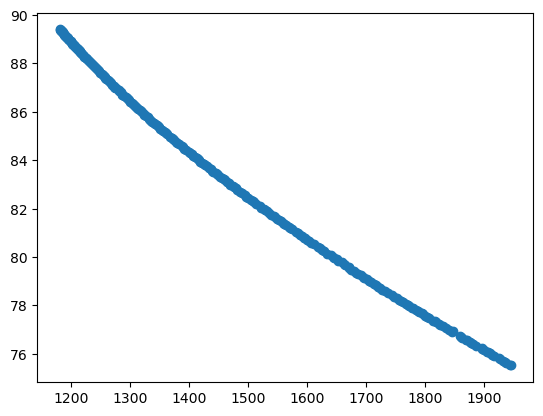

In [ ]:
plt.scatter(y,z)